In [261]:
import glob
import pandas as pd

In [262]:
print('\n'.join(glob.glob('*.csv')))

population_with_access_to_improved_water.csv
wb_el+san.csv
wb_slums.csv
population_with_access_to_improved_sanitation.csv
population_with_sufficient_living_area.csv
population_with_durable_structures.csv
population_in_urban_area.csv
population_in_slums.csv


In [263]:
# urban = pd.read_csv('population_in_urban_area.csv', sep='\t')
# data = pd.DataFrame(data=urban, columns=['Country', '2020']).rename(columns={'2020':'Urban, 2020 (%)'})

In [264]:
# slums = pd.read_csv('population_in_slums.csv', sep='\t')
# slums = pd.DataFrame(slums, columns=['Country', '2001']).rename(columns={'2001':'Slums, 2001 (%)'})
# data = data.join(slums, lsuffix='_0')
# data = data.drop(columns=['Country'])
# data

In [265]:
wb_slums = pd.read_csv('wb_slums.csv')

In [266]:
glob.glob("oecd/*")

['oecd/HM1-1-Housing-stock-and-construction.xlsx',
 'oecd/HC1-2-Housing-costs-over-income.xlsx',
 'oecd/HM1-4-Living-arrangements-age-groups.xlsx',
 'oecd/HC1-4-Subjective-Measures-on-Housing.xlsx',
 'oecd/HC2-3-Severe-housing-deprivation.xlsx',
 'oecd/HM1-5-Housing-stock-by-dwelling-type.xlsx',
 'oecd/HC1-3-Ability-of-households-keep-dwelling-warm.xlsx',
 'oecd/HC3-3-Evictions.xlsx',
 'oecd/HC2-1-Living-space.xlsx',
 'oecd/HC2-2-Households-without-flushing-toilet.xlsx',
 'oecd/HC3-1-Population-experiencing-homelessness.xlsx',
 'oecd/HM1-3-Housing-tenures.xlsx',
 'oecd/HC1-1-Housing-related-expenditure-of-households.xlsx',
 'oecd/HM1-2-Housing-prices.xlsx']

In [267]:
oecd = pd.ExcelFile('main_data.xlsx')

In [268]:
for i in oecd.sheet_names:
    df = pd.read_excel(oecd, sheet_name=i)

    print(df['Indicator'].unique())

print(oecd.sheet_names)

["HC1.2.1. Households' housing cost burden (mortgage and rent cost) as a share of disposable income"]
['HC1.3.1. Share of households with difficulties to keep dwelling warm ']
['HC2.1.1. Average number of rooms per household member among homeowners ']
['HC2.2.1. Share of poor households without a flushing toilet, 2020 or latest year available']
['HM 1.1.1. Dwellings per thousand inhabitants']
['HM1.1.4. Housing construction']
['HM1.3.1. Housing tenure distribution']
['HM1.5.1 Residential dwelling stock by dwelling type']
['HC_1_2_1', 'HC_1_3_1', 'HC_2_1_1', 'HC_2_2_1', 'HM_1_1_1', 'HM_1_1_4', 'HM_1_3_1', 'HM_1_5_1']


In [269]:
countries = list(df['Country'].unique())
countries.append('Korea, Rep.')

## Качество жилья


Перечень показателей:
- доля населения в трущобах
- доля населения, обеспеченная электричеством
- среднее число комнат на человека
- доля домохозяйств без смываемого туалета

In [270]:
quality = pd.DataFrame(columns=['Country', 'Slums, %', 'Electricity, %', 'Poor without flushing toilet, %', 'Rooms per capita, own', 'Rooms per capita, mort'])

In [271]:
quality

,Country,"Slums, %","Electricity, %","Poor without flushing toilet, %","Rooms per capita, own","Rooms per capita, mort"


In [272]:
slums = pd.read_csv('wb_slums.csv')
slums = slums[slums['Country Name'].isin(countries)]

slums.loc[slums['Country Name'] == 'Korea, Rep.', 'Country Name'] = 'Korea'

slums = slums.fillna(0)

slums = slums.drop(columns = ['Country Code', 'Series Name', 'Series Code',
        '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]',
       '2024 [YR2024]'])

slums = slums.rename(columns={'2020 [YR2020]': 'value', "Country Name": "Country"})

In [273]:
electro = pd.read_csv('wb_el+san.csv')
electro = electro[(electro['Country Name'].isin(countries)) & (electro['Series Code'] == 'EG.ELC.ACCS.ZS')]

electro.loc[electro['Country Name'] == 'Korea, Rep.', 'Country Name'] = 'Korea'

electro = electro.drop(columns = ['Country Code', 'Series Name', 'Series Code',
        '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', 
       '2024 [YR2024]'])

electro = electro.fillna(100)

electro = electro.rename(columns={'2023 [YR2023]': 'value', "Country Name": "Country"})
electro['value'] = electro['value'].astype('float')

In [274]:
rooms = pd.read_excel('main_data.xlsx', sheet_name = 'HC_2_1_1')
rooms = rooms.drop(columns=['Indicator'])

rooms_own = pd.DataFrame(data=rooms, columns=['Country', 'Own outright'])
rooms_own = rooms_own.rename(columns={'Own outright': 'value'})

rooms_mort = pd.DataFrame(data=rooms, columns=['Country', 'Owner with mortgage'])
rooms_mort = rooms_mort.rename(columns={'Owner with mortgage': 'value'})

In [275]:
flush = pd.read_excel('main_data.xlsx', sheet_name = 'HC_2_2_1')
flush = flush.drop(columns=['Indicator'])

flush = flush.rename(columns={'Poor share': 'value'})

In [276]:
slums['scaled'] = abs((slums['value']-slums['value'].max())/ (slums['value'].max() - slums['value'].min())) # чем лучше, тем ближе к единице, поэтому тут инвертировано

electro['scaled'] = (electro['value']-electro['value'].min())/ (electro['value'].max() - electro['value'].min())

rooms_own['scaled'] = (rooms_own['value']-rooms_own['value'].min())/ (rooms_own['value'].max() - rooms_own['value'].min())

rooms_mort['scaled'] = (rooms_mort['value']-rooms_mort['value'].min())/ (rooms_mort['value'].max() - rooms_mort['value'].min())

flush['scaled'] = abs((flush['value']-flush['value'].max())/ (flush['value'].max() - flush['value'].min()))

In [277]:
quality['Country'] = rooms['Country']

In [278]:
quality = quality.merge(
    slums[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
quality['Slums, %'] = quality['scaled']

quality = quality.drop(columns=['scaled'])

quality = quality.merge(
    electro[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
quality['Electricity, %'] = quality['scaled']

quality = quality.drop(columns=['scaled'])

quality = quality.merge(
    flush[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
quality['Poor without flushing toilet, %'] = quality['scaled']

quality = quality.drop(columns=['scaled'])

quality = quality.merge(
    rooms_own[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
quality['Rooms per capita, own'] = quality['scaled']

quality = quality.drop(columns=['scaled'])

quality = quality.merge(
    rooms_mort[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
quality['Rooms per capita, mort'] = quality['scaled']

quality = quality.drop(columns=['scaled'])

In [279]:
for_grade = ['Slums, %', 'Electricity, %',
       'Poor without flushing toilet, %', 'Rooms per capita, own',
       'Rooms per capita, mort']

In [280]:
quality_clean = quality.dropna(thresh=quality.shape[1]-1)
quality_clean

,Country,"Slums, %","Electricity, %","Poor without flushing toilet, %","Rooms per capita, own","Rooms per capita, mort"
0,United Kingdom,1.000000,1.000000,0.990558,1.000000,0.853673
1,United States,1.000000,1.000000,NaN,0.947776,1.000000
2,Luxembourg,1.000000,1.000000,1.000000,0.743403,0.607723
3,Ireland,0.517045,1.000000,0.996982,0.734021,0.462902
4,Belgium,1.000000,1.000000,0.965374,0.695301,0.527031
5,Canada,1.000000,1.000000,NaN,0.695096,0.602594
6,Denmark,1.000000,1.000000,0.937760,0.641756,0.619642
7,Norway,1.000000,1.000000,1.000000,0.609770,0.622637
8,Switzerland,1.000000,1.000000,1.000000,0.592536,0.644155
9,Finland,1.000000,1.000000,0.980055,0.577450,0.524772


In [281]:
quality_clean['grade'] = quality_clean[for_grade].mean(axis=1)

/var/folders/kp/3x5xz5491mzf968cwfv_k7ph0000gn/T/ipykernel_856/1712142796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_clean['grade'] = quality_clean[for_grade].mean(axis=1)


In [282]:
import matplotlib.pyplot as plt

## Доступность жилья

Перечень показателей:
- Доля располагаемых доходов на оплату жилища
- Доля домохозяйств с жильем в собствености
- Доля домохозяйств с жильем в ипотеку
- Доля арендованного у частного сектора жилья
- Доля арендованного у публичного сектора жилья
- Доля домохозяйств, испытывающих сложности с отоплением дома
- Жилищ на тысячу населения

In [283]:
accessibility = pd.DataFrame(columns=['Country', 'Burden', 'Own share', 'Heating issues', 'Dwellings suplliance'])

In [284]:
accessibility['Country'] = rooms['Country']

In [285]:
burden = pd.read_excel(oecd, sheet_name= 'HC_1_2_1')
burden = burden.rename(columns={'Total': 'value'})

In [286]:
own_share = pd.read_excel(oecd, sheet_name= 'HM_1_3_1')
own_share = own_share.rename(columns={'Own outright ': 'value'})

In [287]:
own_share.columns

Index(['Country', 'value', 'Owner with mortgage', 'Rent (private)',
       'Rent (subsidised)', 'Other, unknown', 'Indicator'],
      dtype='object')

In [288]:
mort_share = pd.read_excel(oecd, sheet_name= 'HM_1_3_1')
mort_share = mort_share.rename(columns={'Owner with mortgage': 'value'})

In [289]:
heating_issues = pd.read_excel(oecd, sheet_name= 'HC_1_3_1')
heating_issues = heating_issues.rename(columns={'3rd quintile': 'value'})

In [290]:
dwellings = pd.read_excel(oecd, sheet_name= 'HM_1_1_1')
dwellings = dwellings.rename(columns={'Dwellings per 1000 inhabitants (2022 or latest) ':'value'})


In [291]:
burden['scaled'] = abs((burden['value']-burden['value'].max())/ (burden['value'].max() - burden['value'].min()))

own_share['scaled'] = (own_share['value']-own_share['value'].min())/ (own_share['value'].max() - own_share['value'].min())

mort_share['scaled'] = (mort_share['value']-mort_share['value'].min())/ (mort_share['value'].max() - mort_share['value'].min())

heating_issues['scaled'] = abs((heating_issues['value']-heating_issues['value'].max())/ (heating_issues['value'].max() - heating_issues['value'].min()))

dwellings['scaled'] = (dwellings['value']-dwellings['value'].min())/ (dwellings['value'].max() - dwellings['value'].min())

In [292]:
accessibility.columns

Index(['Country', 'Burden', 'Own share', 'Heating issues',
       'Dwellings suplliance'],
      dtype='object')

In [293]:
accessibility = accessibility.merge(
    burden[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
accessibility['Burden'] = accessibility['scaled']
accessibility = accessibility.drop(columns=['scaled'])

accessibility = accessibility.merge(
    own_share[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
accessibility['Own share'] = accessibility['scaled']
accessibility = accessibility.drop(columns=['scaled'])

accessibility = accessibility.merge(
    mort_share[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
accessibility['Mortgage share'] = accessibility['scaled']
accessibility = accessibility.drop(columns=['scaled'])

accessibility = accessibility.merge(
    heating_issues[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
accessibility['Heating issues'] = accessibility['scaled']
accessibility = accessibility.drop(columns=['scaled'])

accessibility = accessibility.merge(
    dwellings[['Country', 'scaled']],
    on = 'Country',
    how = 'left'
)
accessibility['Dwellings suplliance'] = accessibility['scaled']
accessibility = accessibility.drop(columns=['scaled'])

In [294]:
accessibility

,Country,Burden,Own share,Heating issues,Dwellings suplliance,Mortgage share
0,United Kingdom,0.465247,0.390852,0.725756,NaN,0.548791
1,United States,0.531740,0.234034,NaN,0.364750,0.785640
2,Luxembourg,0.000000,0.328055,0.906696,0.213284,0.705512
3,Ireland,0.678848,0.415713,0.588442,0.321584,0.526148
4,Belgium,0.390186,0.314368,0.812102,0.575790,0.673409
5,Canada,0.480771,0.299289,NaN,0.356770,0.751596
6,Denmark,0.103027,0.100122,0.764441,0.661271,0.731224
7,Norway,0.420164,0.198824,0.992218,0.609595,1.000000
8,Switzerland,0.473507,0.000000,1.000000,0.760818,0.643194
9,Finland,0.345378,0.330445,0.949905,0.907929,0.561128


In [295]:
accessibility_clean = accessibility.dropna(thresh=accessibility.shape[1]-1)
accessibility_clean

,Country,Burden,Own share,Heating issues,Dwellings suplliance,Mortgage share
0,United Kingdom,0.465247,0.390852,0.725756,NaN,0.548791
1,United States,0.531740,0.234034,NaN,0.364750,0.785640
2,Luxembourg,0.000000,0.328055,0.906696,0.213284,0.705512
3,Ireland,0.678848,0.415713,0.588442,0.321584,0.526148
4,Belgium,0.390186,0.314368,0.812102,0.575790,0.673409
5,Canada,0.480771,0.299289,NaN,0.356770,0.751596
6,Denmark,0.103027,0.100122,0.764441,0.661271,0.731224
7,Norway,0.420164,0.198824,0.992218,0.609595,1.000000
8,Switzerland,0.473507,0.000000,1.000000,0.760818,0.643194
9,Finland,0.345378,0.330445,0.949905,0.907929,0.561128


In [296]:
for_grade = ['Burden', 'Own share', 'Heating issues',
       'Dwellings suplliance']

In [297]:
accessibility_clean['grade'] = accessibility_clean[for_grade].mean(axis = 1)

/var/folders/kp/3x5xz5491mzf968cwfv_k7ph0000gn/T/ipykernel_856/122428960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accessibility_clean['grade'] = accessibility_clean[for_grade].mean(axis = 1)


## Структура жилья по типу


- Доля "плотного жилья" квартиры
- Доля "неплотного жилья" — ИЖС и таунхаусов

In [300]:
house_type = pd.DataFrame(columns=['Country'])
house_type['Country'] = rooms['Country']

In [301]:
types = pd.read_excel(oecd, sheet_name='HM_1_5_1')


types['value'] = types['Detached house '] + types['Semi-detached house']

house_type = house_type.merge(
    types[['Country', 'value']],
    on='Country',
    how='left'
)

house_type['scaled'] =  (house_type['value']-house_type['value'].min())/ (house_type['value'].max() - house_type['value'].min())

house_type_clean = house_type.dropna(thresh=house_type.shape[1]-1)


,Country,value,scaled
0,United Kingdom,77.887036,0.760641
1,United States,68.640831,0.632672
2,Luxembourg,58.700000,0.495090
3,Ireland,89.300000,0.918598
4,Belgium,77.300000,0.752516
5,Canada,65.384857,0.587609
6,Denmark,65.800000,0.593355
7,Norway,76.700000,0.744212
8,Switzerland,33.900000,0.151855
9,Finland,62.300000,0.544914


In [356]:
house_type_clean.sort_values(by='Country')

,Country,value,scaled
22,Austria,51.800000,0.399593
4,Belgium,77.300000,0.752516
31,Bulgaria,53.000000,0.416201
5,Canada,65.384857,0.587609
26,Costa Rica,95.181592,1.000000
34,Croatia,77.400000,0.753900
19,Cyprus,72.500000,0.686084
28,Czechia,48.500000,0.353921
6,Denmark,65.800000,0.593355
21,EU,57.148148,0.473612


In [339]:
total = pd.DataFrame(columns=['Country'])
total['Country'] = rooms['Country']

total = total.merge(
    quality_clean[['Country', 'grade']],
    on='Country',
    how='left'
)

total['quality'] = total['grade']
total = total.drop(columns=['grade'])

total = total.merge(
    accessibility_clean[['Country', 'grade']],
    on='Country',
    how='left'
)

total['accessibility'] = total['grade']
total = total.drop(columns=['grade'])

total = total.merge(
    house_type_clean[['Country', 'scaled']],
    on='Country',
    how='left'
)

total['suburbanity'] = total['scaled']
total = total.drop(columns=['scaled'])

total_clean = total.dropna()
total_clean

,Country,quality,accessibility,suburbanity
0,United Kingdom,0.968846,0.527285,0.760641
1,United States,0.986944,0.376842,0.632672
2,Luxembourg,0.870225,0.362009,0.495090
3,Ireland,0.742190,0.501147,0.918598
4,Belgium,0.837541,0.523111,0.752516
5,Canada,0.824423,0.378944,0.587609
6,Denmark,0.839831,0.407215,0.593355
7,Norway,0.846481,0.555200,0.744212
8,Switzerland,0.847338,0.558581,0.151855
9,Finland,0.816455,0.633414,0.544914


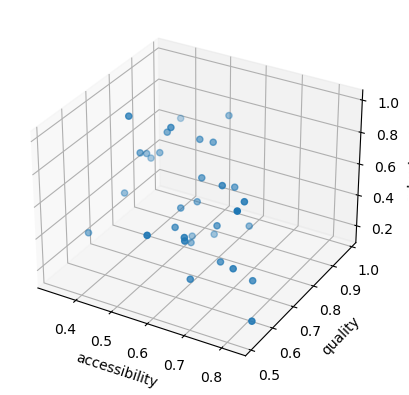

In [307]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


xs = total_clean['accessibility']
ys = total_clean['quality']
zs = total_clean['suburbanity']

ax.set_xlabel('accessibility')
ax.set_ylabel('quality')
ax.set_zlabel('suburbanity')

ax.scatter(xs, ys, zs)

In [308]:
total_clean.columns

Index(['Country', 'quality', 'accessibility', 'suburbanity'], dtype='object')

## Кластеризация


In [309]:
from sklearn.cluster import KMeans

### Методом k-средних, выбираем количество кластеров

/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

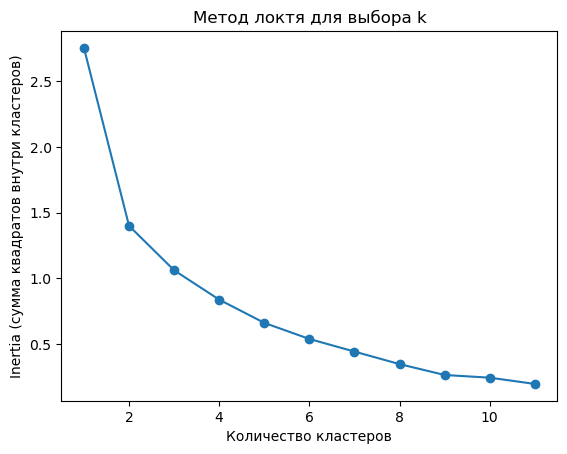

In [351]:
X = total_clean[['quality', 'accessibility', 'suburbanity']]

inertia = []
k_range = range(1, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia (сумма квадратов внутри кластеров)')
plt.title('Метод локтя для выбора k')
plt.show()


/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

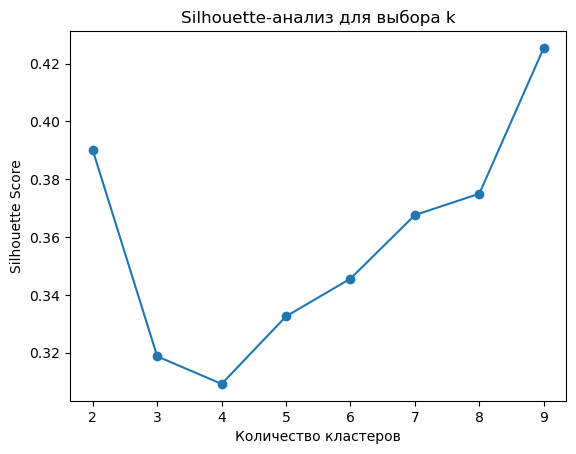

In [343]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette-анализ для выбора k')
plt.show()


/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

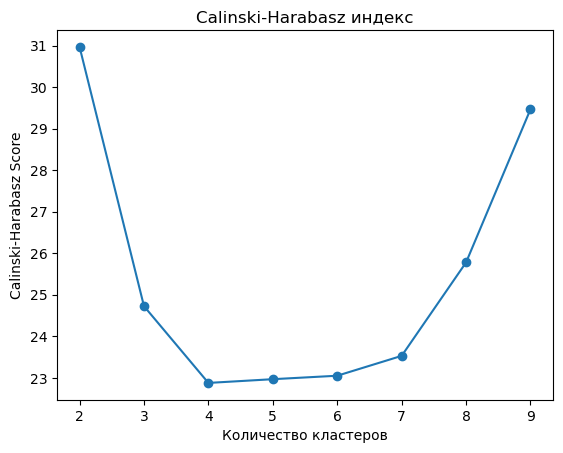

In [344]:
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = calinski_harabasz_score(X, labels)
    scores.append(score)

plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz индекс')
plt.show()


### Будем разбивать на 9 кластеров

/Users/air/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/kp/3x5xz5491mzf968cwfv_k7ph0000gn/T/ipykernel_856/2968230876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_clean['Cluster'] = kmeans.fit_predict(X)


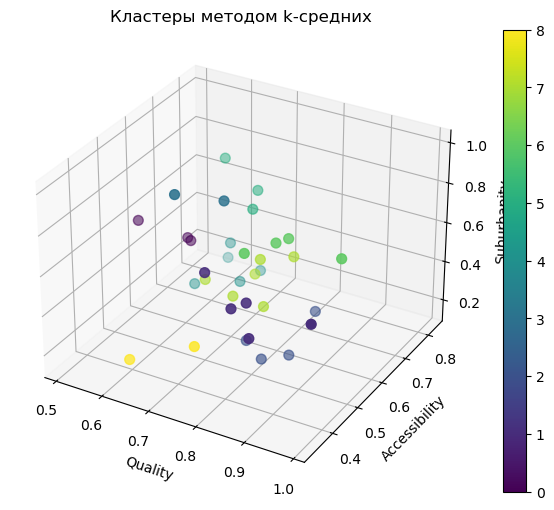

In [345]:
kmeans = KMeans(n_clusters=9, random_state=42)
total_clean['Cluster'] = kmeans.fit_predict(X)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    total_clean['quality'],
    total_clean['accessibility'],
    total_clean['suburbanity'],
    c=total_clean['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_xlabel('Quality')
ax.set_ylabel('Accessibility')
ax.set_zlabel('Suburbanity')
plt.title('Кластеры методом k-средних')
plt.colorbar(sc)
plt.show()


In [346]:
total_clean.sort_values(by='Cluster')

,Country,quality,accessibility,suburbanity,Cluster
40,Slovak Republic,0.587055,0.633555,0.486786,0
36,Romania,0.509691,0.580546,0.582283,0
39,Poland,0.598660,0.625394,0.488170,0
1,United States,0.986944,0.376842,0.632672,1
2,Luxembourg,0.870225,0.362009,0.495090,1
19,Cyprus,0.755804,0.404874,0.686084,1
5,Canada,0.824423,0.378944,0.587609,1
6,Denmark,0.839831,0.407215,0.593355,1
16,Germany,0.765645,0.541577,0.187839,2
12,Spain,0.811368,0.516974,0.156007,2


In [347]:
total_clean.columns

Index(['Country', 'quality', 'accessibility', 'suburbanity', 'Cluster'], dtype='object')

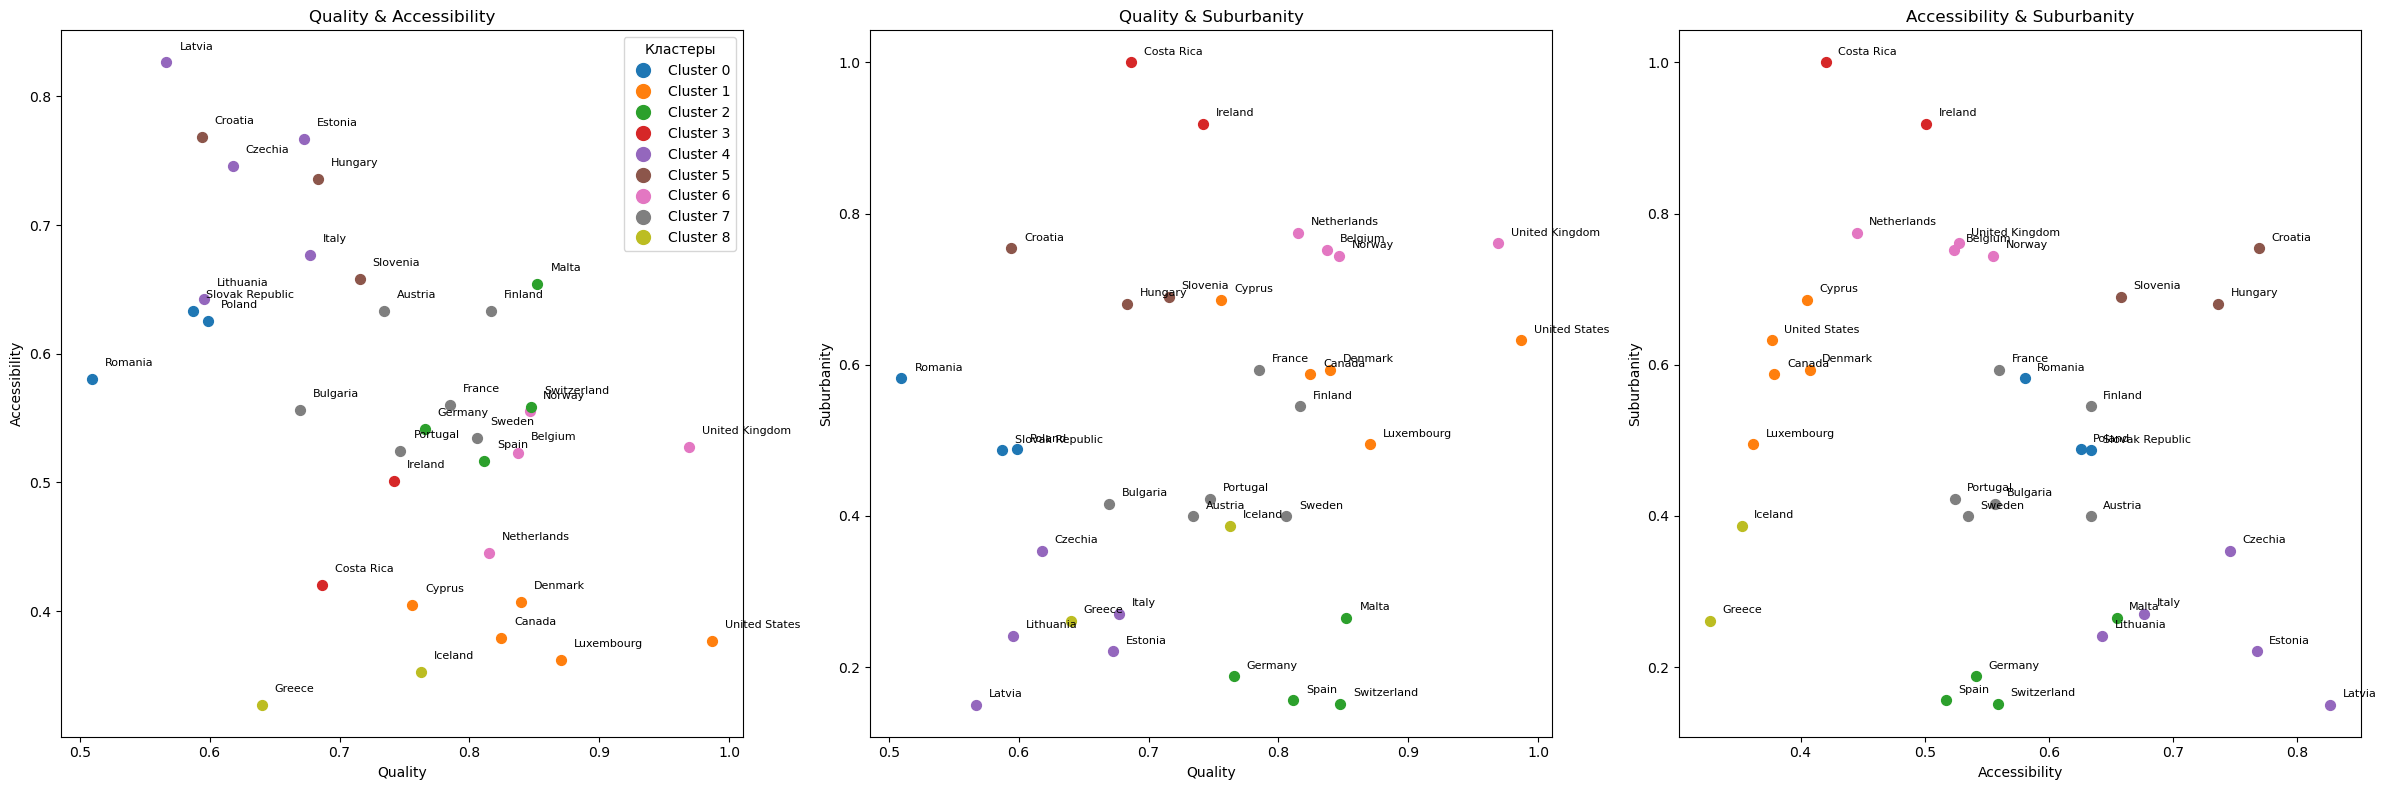

In [348]:
feature_pairs = [
    ('quality', 'accessibility'),
    ('quality', 'suburbanity'),
    ('accessibility', 'suburbanity')
]

# Цвета для кластеров (если у тебя до 10 кластеров)
colors = plt.cm.tab10

# Размер графика
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for ax, (x_feature, y_feature) in zip(axes, feature_pairs):
    for i, row in total_clean.iterrows():
        cluster = row['Cluster']
        ax.scatter(row[x_feature], row[y_feature], 
                   color=colors(cluster), s=50, label=f"Cluster {cluster}" if i == 0 else "")
        ax.text(row[x_feature] + 0.01, row[y_feature] + 0.01, row['Country'], fontsize=8)

    ax.set_xlabel(x_feature.capitalize())
    ax.set_ylabel(y_feature.capitalize())
    ax.set_title(f'{x_feature.capitalize()} & {y_feature.capitalize()}')

# Легенда для одного из графиков (или вручную)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                      markerfacecolor=colors(i), markersize=12)
           for i in sorted(total_clean['Cluster'].unique())]
axes[0].legend(handles=handles, title="Кластеры")

plt.tight_layout()
plt.show()



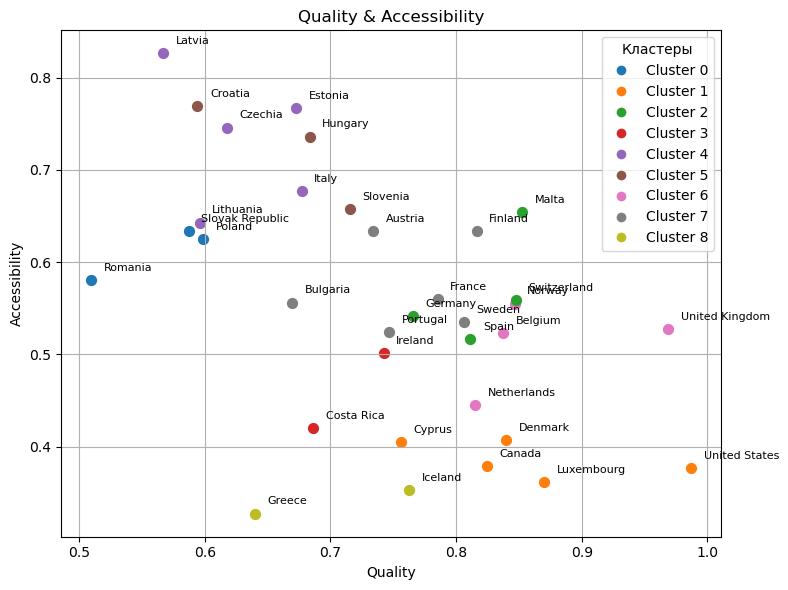

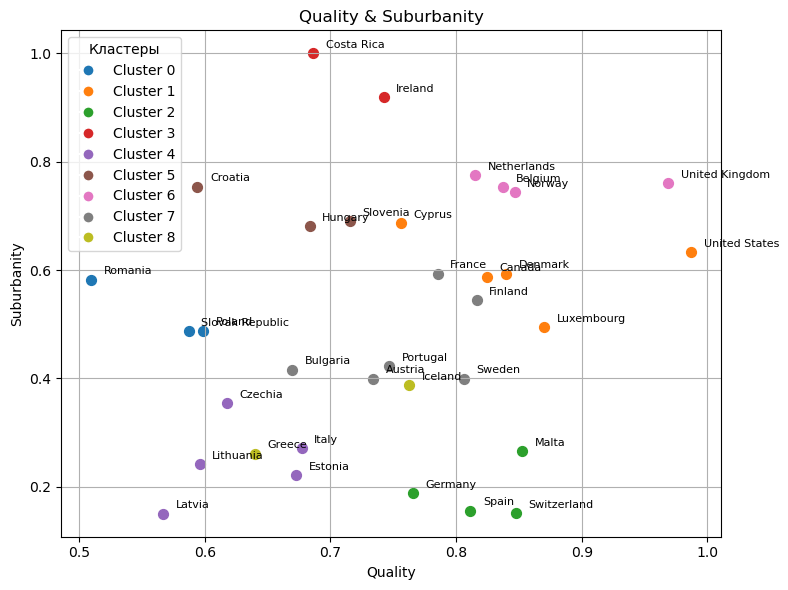

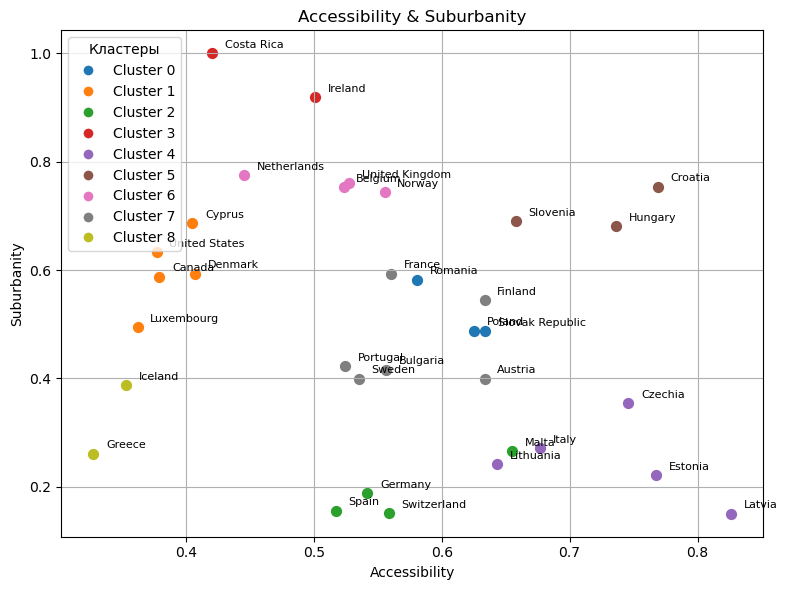

In [353]:
import matplotlib.pyplot as plt

# Убедись, что в total_clean есть колонки:
# 'quality', 'accessibility', 'suburbanity', 'Cluster', 'country'

# Пары признаков
feature_pairs = [
    ('quality', 'accessibility'),
    ('quality', 'suburbanity'),
    ('accessibility', 'suburbanity')
]

# Цветовая карта (до 10 кластеров)
colors = plt.cm.tab10

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(8, 6))
    for i, row in total_clean.iterrows():
        cluster = row['Cluster']
        plt.scatter(row[x_feature], row[y_feature],
                    color=colors(cluster), s=50)
        plt.text(row[x_feature] + 0.01, row[y_feature] + 0.01,
                 row['Country'], fontsize=8)

    plt.xlabel(x_feature.capitalize())
    plt.ylabel(y_feature.capitalize())
    plt.title(f'{x_feature.capitalize()} & {y_feature.capitalize()}')

    # Добавим легенду
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          label=f'Cluster {i}',
                          markerfacecolor=colors(i), markersize=8)
               for i in sorted(total_clean['Cluster'].unique())]
    plt.legend(handles=handles, title='Кластеры')

    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [349]:
for i in oecd.sheet_names:
    df = pd.read_excel(oecd, sheet_name=i)

    print(len(df['Country'].unique()))

44
31
42
39
38
38
43
43


In [350]:
len(total_clean.Country)

34